In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

### `Q-1:` Using Gapminder Data
1. Create a scatter plot of 'gdpPercap' against 'lifeExp' for the year 2007, with the size of the markers determined by 'pop' and the color determined by 'continent'.

In [2]:
# code here
import plotly.express as px
df = px.data.gapminder()
df.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


<Axes: xlabel='gdpPercap', ylabel='lifeExp'>

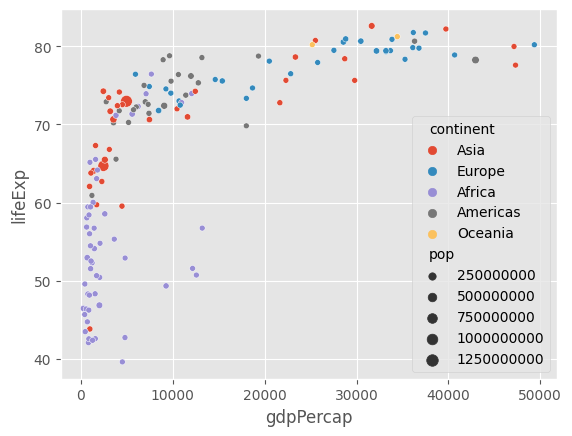

In [6]:
sns.scatterplot(data=df[df['year']==2007],x='gdpPercap',y='lifeExp',size='pop',hue='continent')

### `Q-2-3:` Using `flights` dataset of seaborn.

2. Using the "flights" dataset that comes with seaborn, create a heatmap that shows the average number of passengers per month for each year.

3. Using the seaborn's flight dataset, create a clustermap to visualize the relationship between the number of passengers, months, and year.


In [8]:
df=sns.load_dataset('flights')
df.head(3)

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132


<Axes: xlabel='month', ylabel='year'>

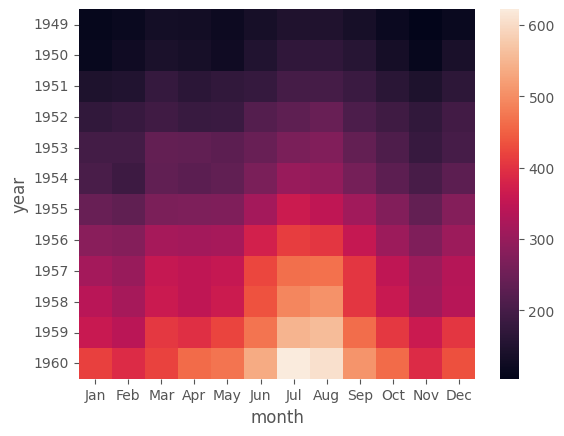

In [14]:
sns.heatmap(df.pivot_table(index='year',columns='month',values='passengers',aggfunc='mean'))

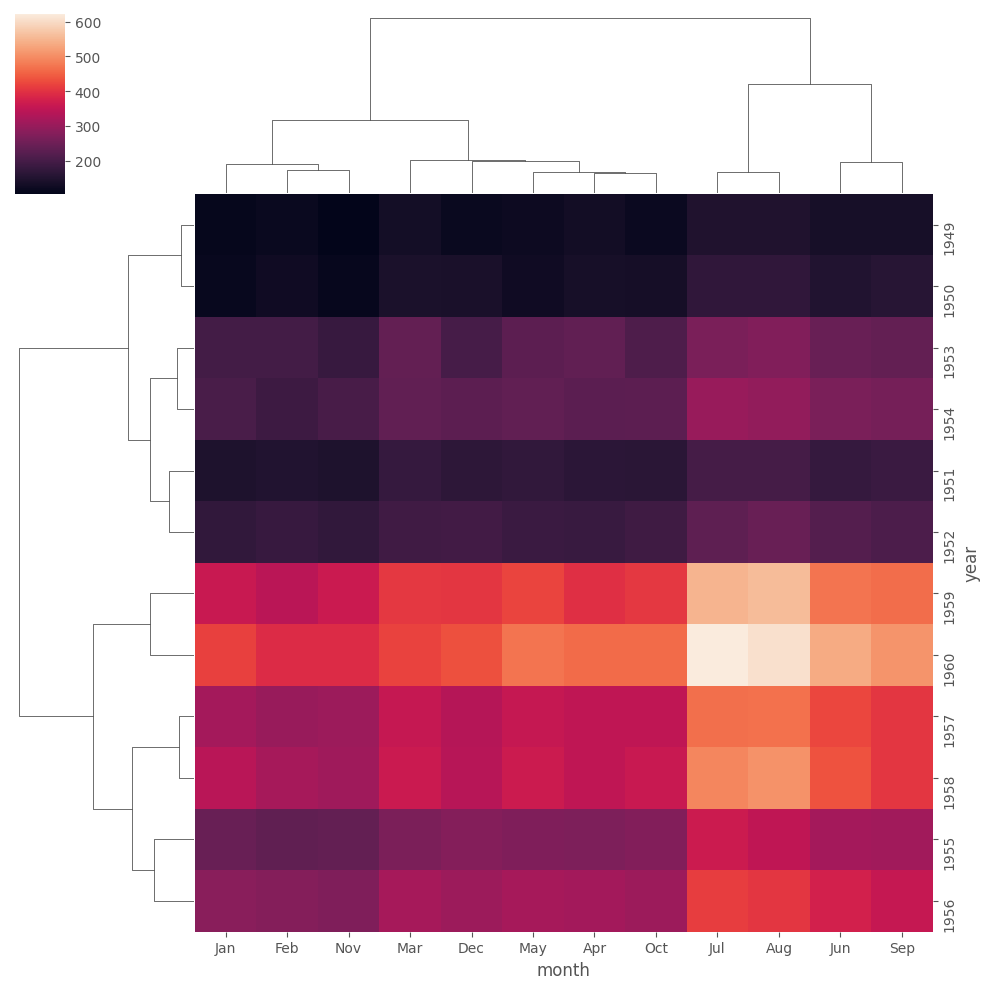

In [24]:
sns.clustermap(df.pivot_table(index='year',columns='month',values='passengers',aggfunc='mean'))

## For questions 4-8:

For these qestions, an insurance dataset is used. You can get details from [here](https://www.kaggle.com/datasets/thedevastator/insurance-claim-analysis-demographic-and-health). And if you want this dataset to use directly, then you can use this link: **https://docs.google.com/spreadsheets/d/e/2PACX-1vQVpcVtdYdZU4zU4-lqxt-iPHkyndDWs_aqEDUu9ZodlJ48Dku0PFgdXlj2N5RCmwXJrNtZLsI_wEVf/pub?gid=220677750&single=true&output=csv**

In [25]:
df=pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQVpcVtdYdZU4zU4-lqxt-iPHkyndDWs_aqEDUu9ZodlJ48Dku0PFgdXlj2N5RCmwXJrNtZLsI_wEVf/pub?gid=220677750&single=true&output=csv')
df.head(3)

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94


### **`Q-4:`** Draw a scatter plot based on the below conditions:
1. x-axis should be "age" and y-axis should be "bmi".
2. For hue, size and style parameters use "diabetic", "gender" and "smoker" column respectively.
3. Add title to your chart.
4. Age should be less than 70 percentiles.
5. BMI should be greater than the average value of the filtered age dataset.

In [49]:
p70=np.percentile(df['age'].dropna(),70)
dft=df.dropna()
dft=dft[dft['age']<p70]
dft=dft[dft['bmi']>dft['bmi'].mean()]

Text(0.5, 1.0, 'age vs bmi')

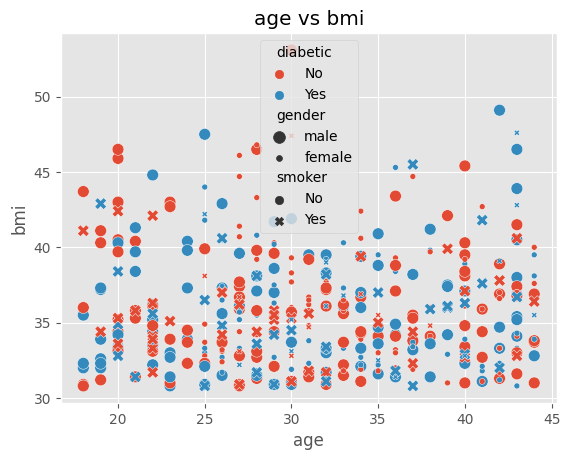

In [50]:
ax=sns.scatterplot(data=dft,x='age',y='bmi',hue='diabetic',size='gender',style='smoker')
ax.set_title('age vs bmi')

### **`Q-5:`** Draw a line plot by using the below informations

1. bloodpressure vs children
2. Blood-pressure values should be between 90 and 100. The upper and lower limit are included.
3. Show the details of "smoker".

In [56]:
dft=df[(df['bloodpressure']>=90) & (df['bloodpressure']<=100)]

<Axes: xlabel='bloodpressure', ylabel='children'>

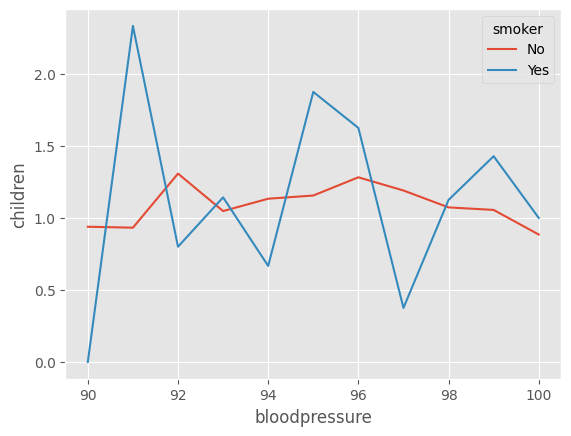

In [59]:
sns.lineplot(data=dft,x='bloodpressure',y='children',hue='smoker',err_style=None)

### **`Q-6:`** Draw a histogram using displot

- based on "age" column.
- Show details of "smoker" (hue).
- Create 2 separate charts for the above 2 conditions based on "gender" side-by-side.

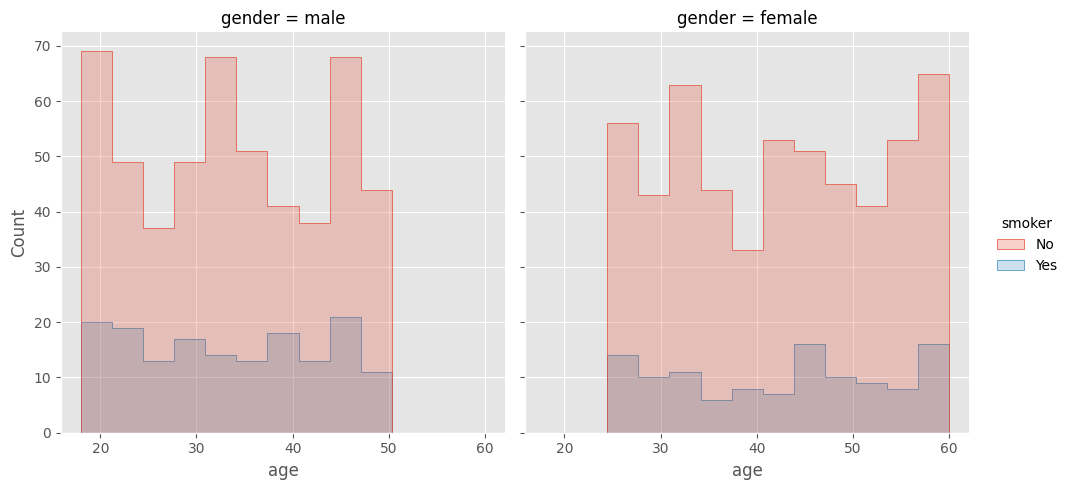

In [68]:
sns.displot(kind='hist',data=df,x='age',hue='smoker',col='gender',element='step')

### **`Q-7:`** Draw a kde plot between "age" and "bloodpressure".

<Axes: xlabel='age', ylabel='bloodpressure'>

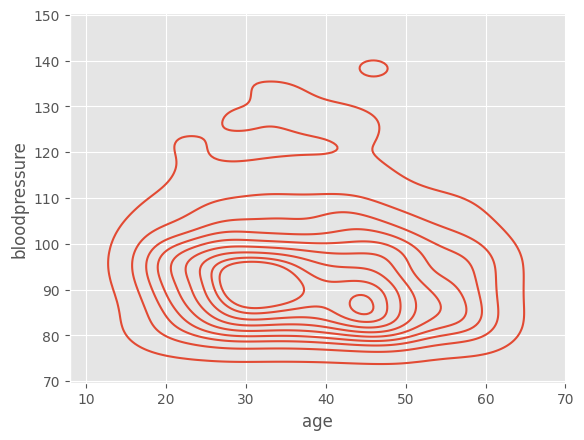

In [74]:
sns.kdeplot(data=df.dropna(),x='age',y='bloodpressure')

### **`Q-8:`** Draw a clustermap between between "age", "bmi" and "bloodpressure".

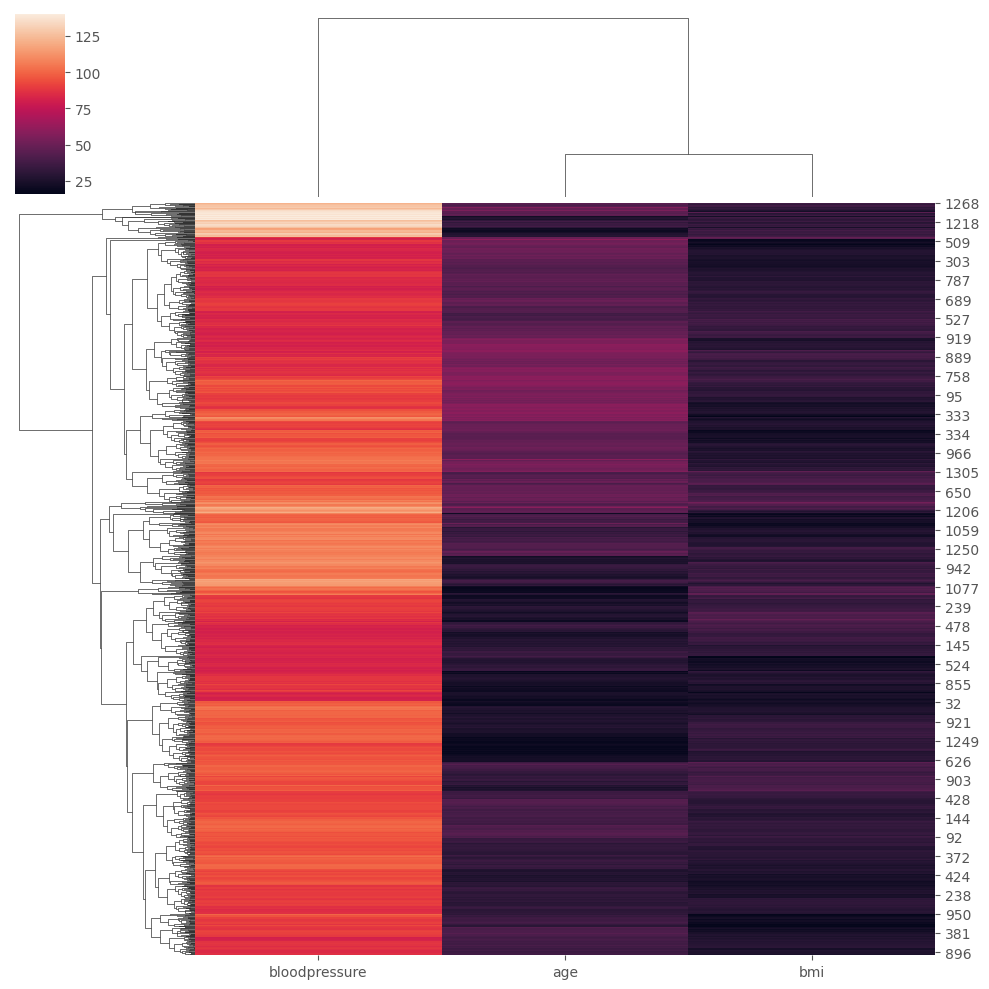

In [73]:
sns.clustermap(df.dropna().iloc[:,[2,4,5]])